In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)
incidents = pd.read_csv('incidents_sub.csv')
alerts = pd.read_csv('alerts_sub.csv')

In [40]:
# use only hope deopt sev 1 incidents

incidents = incidents.loc[(incidents['incident_priority']=='1 - Critical') & (incidents['incident_acc']=='ACCT0011196')]

#epoch
incidents['u_updated_on'] = pd.to_datetime(incidents['u_updated_on']).dt.tz_convert('UTC')
incidents['epoch'] = (incidents['u_updated_on'] - pd.Timestamp("1970-01-01", tz='UTC')) // pd.Timedelta('1s')


In [41]:
incidents

,incident_id,incident_acc,incident_sub_acc,incident_site,incident_sub_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
0,INC0465359,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011688,Resolved,NaN,Multiple switch devices were disconnected at s...,SG24KMY0VP,CentralSite-C-2100-AGG-SWITCH-ACCT0011688,Central,C-2100,1 - Critical,2023-03-08T22:42:00.000Z,2023-03-09 00:00:32+00:00,2023,3,9,1678320032
5,INC0465359,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011688,Resolved,NaN,Multiple switch devices were disconnected at s...,SG24KMY0VP,CentralSite-C-2100-AGG-SWITCH-ACCT0011688,Central,C-2100,1 - Critical,2023-03-08T22:42:00.000Z,2023-03-09 00:00:29+00:00,2023,3,9,1678320029
11,INC0478916,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012266,In Progress,NaN,Module rebooted. Reason : Power on reset with ...,SG2BKMY1P6,SG2BKMY1P6-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-03-20T20:15:18.000Z,2023-03-21 00:00:33+00:00,2023,3,21,1679356833
22,INC0479023,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011377,In Progress,NaN,NAE status reached or exceeds the desired seve...,SG19KMX0J3,SG19KMX0J3-C-208,Central,C-208,1 - Critical,2023-03-20T23:15:44.000Z,2023-03-21 00:01:10+00:00,2023,3,21,1679356870
101,INC0265296,ACCT0011196,ACCT0011199,ACCT0011200,NaN,New,NaN,UXI: Primary DNS failing. Issue code: PRIMARY_...,NaN,ACCT0011196-PRIMARY_DNS_FAILURE-Guest-WiFi-sev1,NaN,NaN,1 - Critical,2022-10-17T16:02:15.000Z,2023-03-01 00:01:50+00:00,2023,3,1,1677628910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723629,INC0477064,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012645,In Progress,NaN,NAE status reached or exceeds the desired seve...,SG27KMX087,SG27KMX087-C-208,Central,C-208,1 - Critical,2023-03-18T11:18:41.000Z,2023-03-18 11:29:43+00:00,2023,3,18,1679138983
723851,INC0477190,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,NAE status reached or exceeds the desired seve...,SG27KMX0TM,SG27KMX0TM-C-208,Central,C-208,1 - Critical,2023-03-18T15:27:16.000Z,2023-03-18 15:27:16+00:00,2023,3,18,1679153236
723852,INC0477190,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,In Progress,NaN,NAE status reached or exceeds the desired seve...,SG27KMX0TM,SG27KMX0TM-C-208,Central,C-208,1 - Critical,2023-03-18T15:27:16.000Z,2023-03-18 15:31:50+00:00,2023,3,18,1679153510
723870,INC0477199,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0013199,In Progress,NaN,Module rebooted. Reason : Power on reset with ...,SG03KMY0T7,SG03KMY0T7-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-03-18T15:46:05.000Z,2023-03-18 15:47:30+00:00,2023,3,18,1679154450


In [42]:
# use only home depot
alerts = alerts.loc[alerts['alert_acc_id'] == 'ACCT0011196']
alerts['alert_timestamp'] = pd.to_datetime(alerts['alert_timestamp'], unit='ns')

# convert datetime objects to epoch in seconds
alerts['epoch'] = alerts['alert_timestamp'].astype(int) // 10**9

In [43]:
alerts

,alert_acc_id,alert_aub_acc_id,alert_site_id,alert_sub_site_id,alert_event_type,alert_device_id,alert_device_type,alert_id,category,sub_category,description,alert_timestamp,alert_severity,alert_y,alert_m,alert_d,epoch
0,ACCT0011196,ACCT0011199,ACCT0011200,NaN,uxi,NaN,uxi,ACCT0011196-EXTERNAL_SERVICE_UNAVAILABLE-Guest...,uxi,external,NaN,2023-02-11 18:22:04,Critical,2023,2,11,1676139724
1,ACCT0011196,ACCT0011199,ACCT0011200,NaN,uxi,NaN,uxi,ACCT0011196-EXTERNAL_SERVICE_UNAVAILABLE-Wired...,uxi,external,NaN,2023-02-11 18:25:05,Critical,2023,2,11,1676139905
2,ACCT0011196,ACCT0011199,ACCT0011200,NaN,uxi,NaN,uxi,ACCT0011196-EXTERNAL_SERVICE_UNAVAILABLE-Wired...,uxi,external,NaN,2023-02-11 18:28:05,Critical,2023,2,11,1676140085
3,ACCT0011196,ACCT0011199,ACCT0011200,NaN,uxi,NaN,uxi,ACCT0011196-EXTERNAL_SERVICE_UNAVAILABLE-Guest...,uxi,external,NaN,2023-02-11 18:28:05,Critical,2023,2,11,1676140085
4,ACCT0011196,ACCT0011199,ACCT0011200,NaN,uxi,NaN,uxi,ACCT0011196-EXTERNAL_SERVICE_UNAVAILABLE-Guest...,uxi,external,NaN,2023-02-11 18:31:03,Critical,2023,2,11,1676140263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137054,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0013025,TEMPERATURE,SG22KMY0N8,switch,SG22KMY0N8-CE-CX-806,Temperature,CE-CX-806,Ambient temperature for sensor Inlet-Air above...,2023-04-03 20:00:08,Warning,2023,4,3,1680552008
137055,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0013163,Switch NAE Status,SG23KMX01G,switch,SG23KMX01G-C-208-NAE-OTHER,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-04-03 04:22:27,Critical,2023,4,3,1680495747
137056,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0013163,Switch NAE Status,SG23KMX01G,switch,SG23KMX01G-C-208-NAE-OTHER,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-04-03 08:52:33,Critical,2023,4,3,1680511953
137057,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0011640,Switch NAE Status,SG18KMX01R,switch,SG18KMX01R-C-208-NAE-OTHER,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-04-03 03:04:50,Critical,2023,4,3,1680491090


In [44]:
incidents.groupby('incident_sub_site').count().sort_values(by='incident_id')

,incident_id,incident_acc,incident_sub_acc,incident_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
incident_sub_site,,,,,,,,,,,,,,,,,,
ACCT0013257,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
ACCT0013243,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
ACCT0012444,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
ACCT0011434,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
ACCT0011485,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCT0012924,197,197,197,197,197,120,197,197,197,197,197,197,197,197,197,197,197,197
ACCT0012557,217,217,217,217,217,156,217,217,217,217,217,217,217,217,217,217,217,217
ACCT0011385,252,252,252,252,252,54,252,252,252,252,252,252,252,252,252,252,252,252


In [45]:
alerts.groupby('alert_sub_site_id').count().sort_values(by='alert_id')

,alert_acc_id,alert_aub_acc_id,alert_site_id,alert_event_type,alert_device_id,alert_device_type,alert_id,category,sub_category,description,alert_timestamp,alert_severity,alert_y,alert_m,alert_d,epoch
alert_sub_site_id,,,,,,,,,,,,,,,,
ACCT0011717,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ACCT0012429,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ACCT0012946,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ACCT0012950,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ACCT0012062,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACCT0011307,1778,1778,1778,1778,1777,1778,1778,1778,1778,1777,1778,1778,1778,1778,1778,1778
ACCT0011348,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886,1886
ACCT0012160,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440,2440


In [46]:
inc_sub = incidents.loc[incidents['incident_sub_site']=='ACCT0012484']
alert_sub = alerts.loc[alerts['alert_sub_site_id']=='ACCT0012484']

In [55]:
#inc_sub.groupby('incident_sub_category').count()
inc_sub.loc[inc_sub['incident_sub_category'] == 'CE-CX-1206']

,incident_id,incident_acc,incident_sub_acc,incident_site,incident_sub_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
122770,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 11:26:54+00:00,2023,2,10,1676028414
122773,INC0428444,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Power on reset with ...,SG26KMY936,SG26KMY936-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:27:45.000Z,2023-02-10 11:27:45+00:00,2023,2,10,1676028465
122793,INC0428479,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Power on reset with ...,SG26KMY935,SG26KMY935-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:31:38.000Z,2023-02-10 11:33:01+00:00,2023,2,10,1676028781
123025,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,In Progress,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 12:20:52+00:00,2023,2,10,1676031652
183472,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 11:28:36+00:00,2023,2,10,1676028516
183473,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 11:28:37+00:00,2023,2,10,1676028517
197059,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 11:32:59+00:00,2023,2,10,1676028779
197061,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 11:33:00+00:00,2023,2,10,1676028780
226780,INC0428479,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Power on reset with ...,SG26KMY935,SG26KMY935-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:31:38.000Z,2023-02-10 11:33:02+00:00,2023,2,10,1676028782
285718,INC0428444,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Power on reset with ...,SG26KMY936,SG26KMY936-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:27:45.000Z,2023-02-10 11:30:42+00:00,2023,2,10,1676028642


In [48]:
alert_sub.groupby('sub_category').count()

,alert_acc_id,alert_aub_acc_id,alert_site_id,alert_sub_site_id,alert_event_type,alert_device_id,alert_device_type,alert_id,category,description,alert_timestamp,alert_severity,alert_y,alert_m,alert_d,epoch
sub_category,,,,,,,,,,,,,,,,
C-208,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293,293
CE-CX-1310,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
CE-CX-1311,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [49]:
incidents.groupby('incident_sub_category').count()

,incident_id,incident_acc,incident_sub_acc,incident_site,incident_sub_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
incident_sub_category,,,,,,,,,,,,,,,,,,
C-1251,64,64,64,64,64,64,0,64,64,64,64,64,64,64,64,64,64,64
C-1310,9,9,9,9,9,9,2,9,9,0,9,9,9,9,9,9,9,9
C-208,13465,13465,13465,13465,13465,13465,977,13465,13465,13465,13465,13465,13465,13465,13465,13465,13465,13465
C-2100,1857,1857,1857,1857,1857,1857,504,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857,1857
CE-CX-1201,533,533,533,533,533,533,13,533,533,533,533,533,533,533,533,533,533,533
CE-CX-1206,17665,17665,17665,17665,17665,17665,515,17665,17665,17665,17665,17665,17665,17665,17665,17665,17665,17665
CE-CX-9913,9,9,9,9,9,9,3,9,9,0,9,9,9,9,9,9,9,9
external,565,565,565,565,0,565,0,565,0,565,565,565,565,565,565,565,565,565
network,14,14,14,14,0,14,6,14,0,14,14,14,14,14,14,14,14,14


In [50]:
alerts.groupby('sub_category').count()

,alert_acc_id,alert_aub_acc_id,alert_site_id,alert_sub_site_id,alert_event_type,alert_device_id,alert_device_type,alert_id,category,description,alert_timestamp,alert_severity,alert_y,alert_m,alert_d,epoch
sub_category,,,,,,,,,,,,,,,,
C-1249,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
C-1251,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
C-1252,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
C-1253,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774,774
C-1256,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539,539
C-1259,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335
C-1300,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82,82
C-1303,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
C-1304,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60


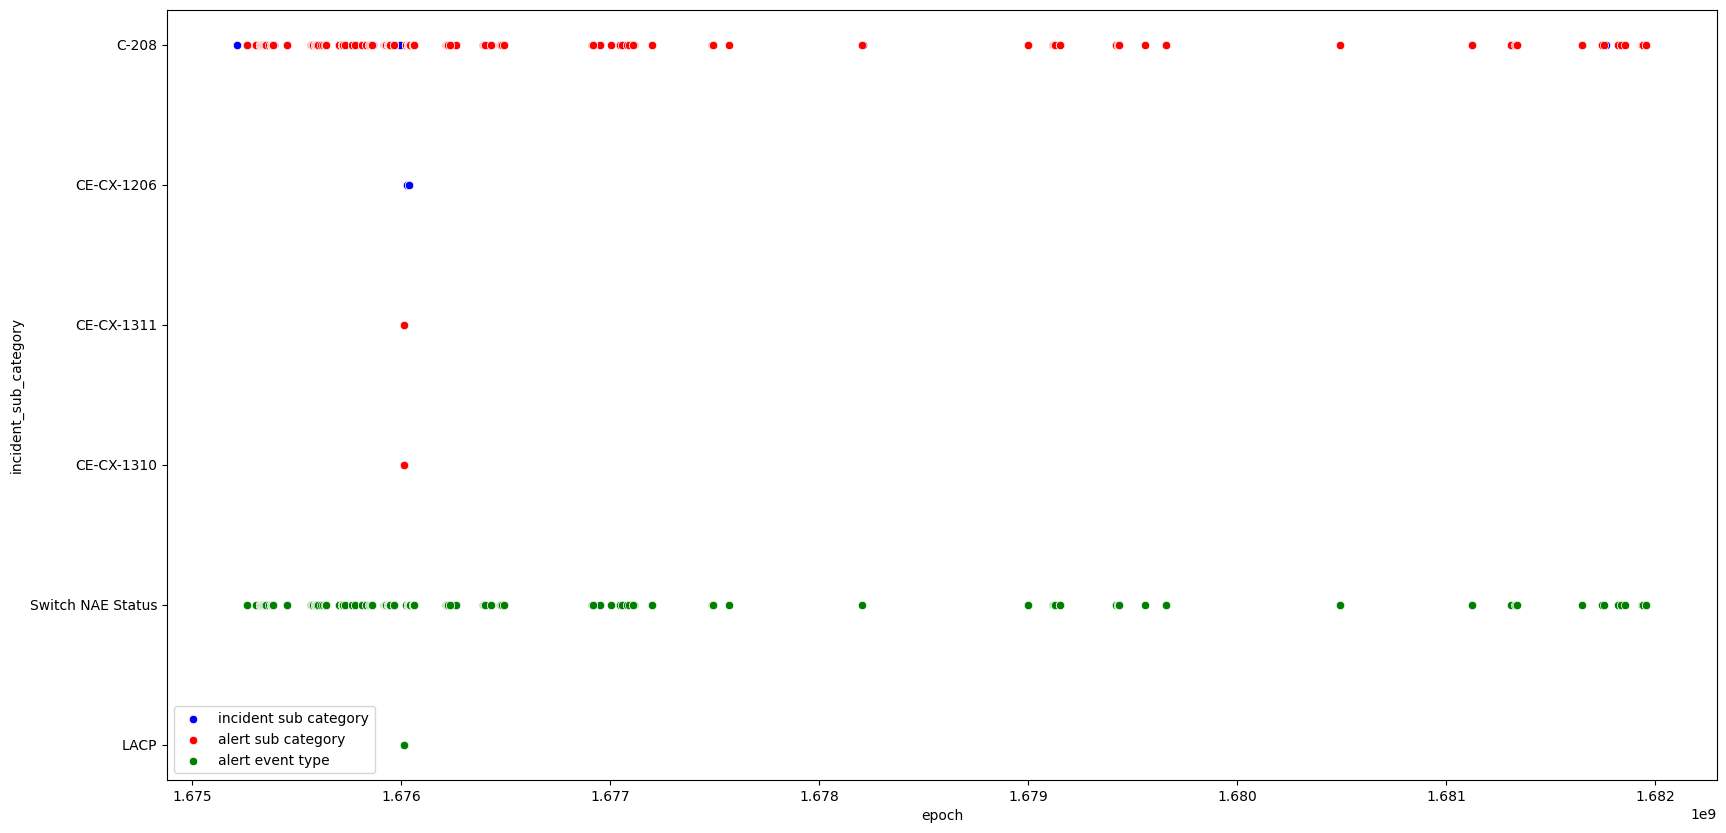

In [54]:
mpl.figure(figsize=(20, 10))


sns.scatterplot(data = inc_sub, x = 'epoch', y = 'incident_sub_category', color='blue', label = 'incident sub category')

sns.scatterplot(data = alert_sub, x = 'epoch', y = 'sub_category', color='red', label = 'alert sub category')

sns.scatterplot(data = alert_sub, x = 'epoch', y = 'alert_event_type', color = 'green', label = 'alert event type')
mpl.show()

In [76]:
#till 5th feb incidents and alerts
inc_5feb = inc_sub[inc_sub['epoch'] < 1675555200]
alert_5feb = alert_sub[alert_sub['epoch'] < 1675555200]

# from 5th to 10th feb
inc_10feb = inc_sub[(inc_sub['epoch'] > 1675555200) & (inc_sub['epoch'] < 1675987200)]
alert_10feb = alert_sub[(alert_sub['epoch'] > 1675555200) & (alert_sub['epoch'] < 1675987200)]

# from 10th to 15th feb
inc_15feb = inc_sub[(inc_sub['epoch'] > 1675987200) & (inc_sub['epoch'] < 1676419200)]
alert_15feb = alert_sub[(alert_sub['epoch'] > 1675987200) & (alert_sub['epoch'] < 1676419200)]

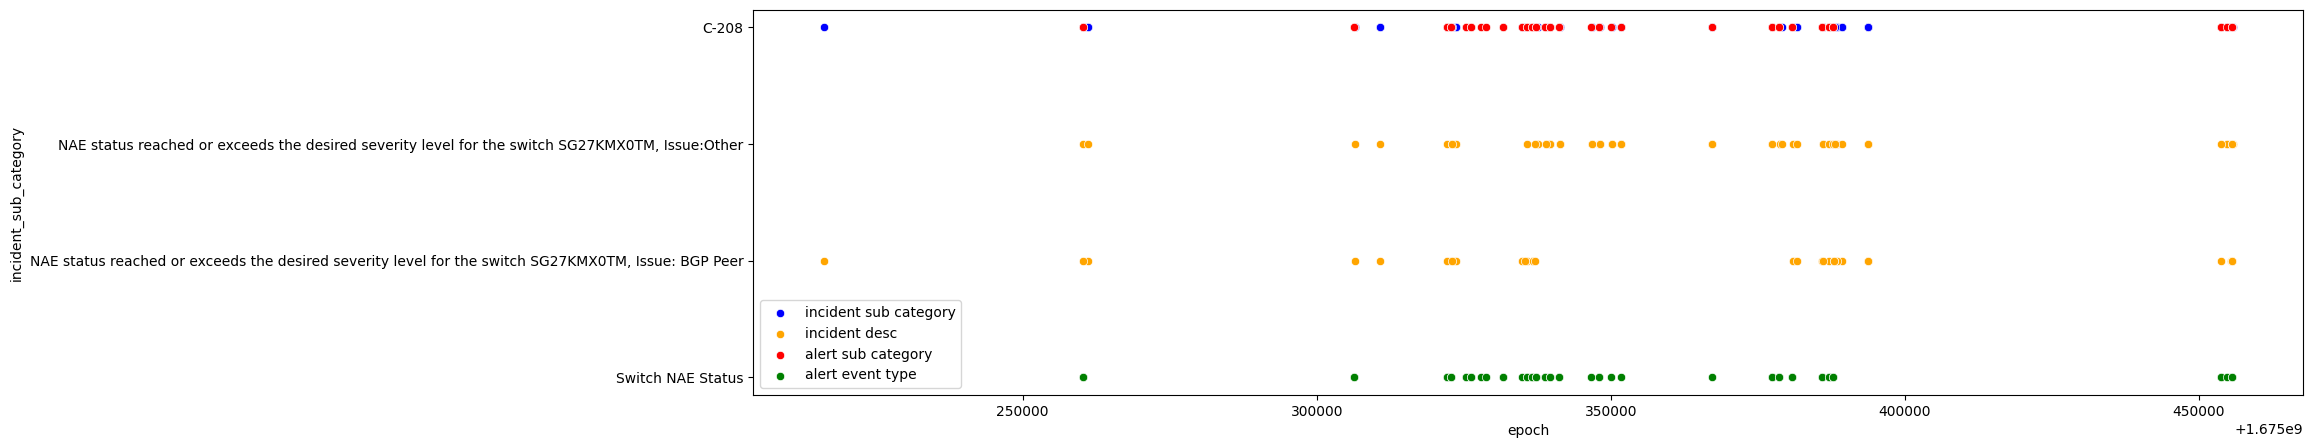

In [77]:
mpl.figure(figsize=(20, 5))


sns.scatterplot(data = inc_5feb, x = 'epoch', y = 'incident_sub_category', color='blue', label = 'incident sub category')

sns.scatterplot(data = inc_5feb, x = 'epoch', y = 'incident_desc', color = 'orange', label = 'incident desc')

sns.scatterplot(data = alert_5feb, x = 'epoch', y = 'sub_category', color='red', label = 'alert sub category')

sns.scatterplot(data = alert_5feb, x = 'epoch', y = 'alert_event_type', color = 'green', label = 'alert event type')
mpl.show()

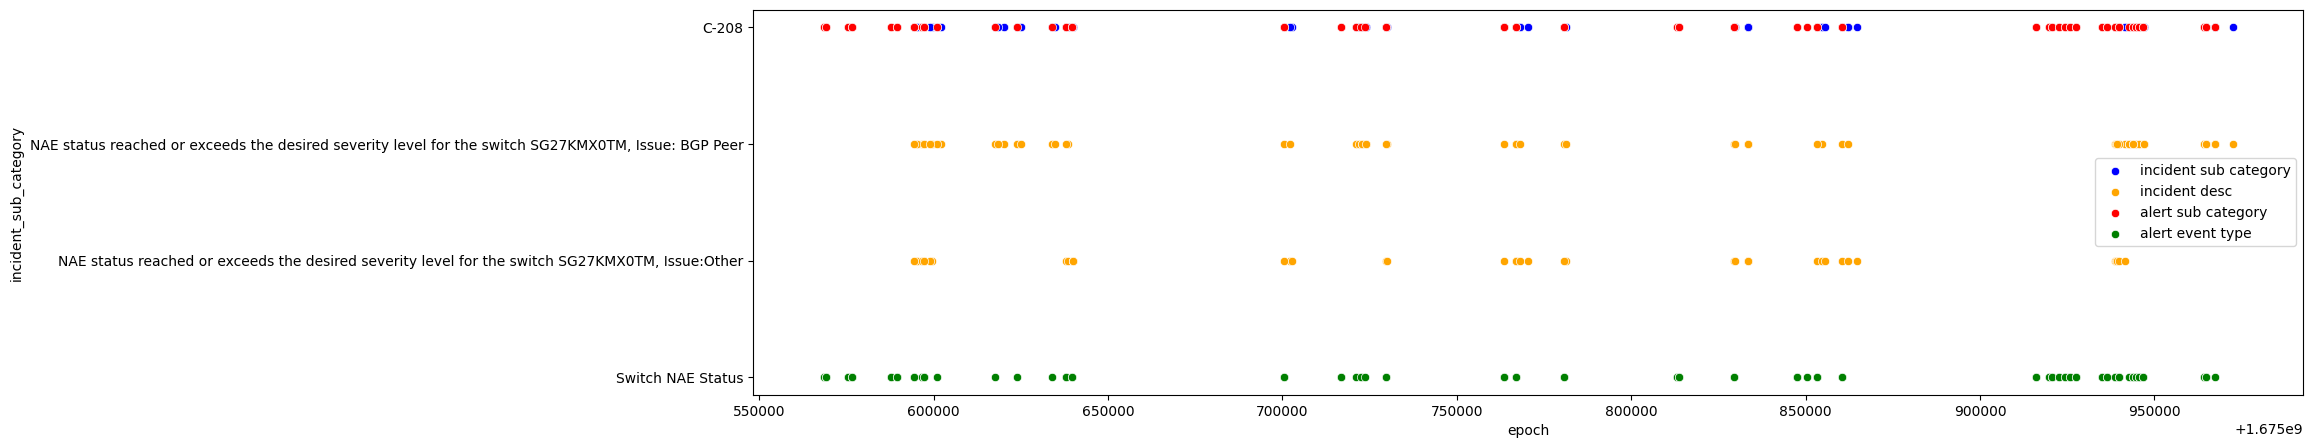

In [78]:
mpl.figure(figsize=(20, 5))


sns.scatterplot(data = inc_10feb, x = 'epoch', y = 'incident_sub_category', color='blue', label = 'incident sub category')

sns.scatterplot(data = inc_10feb, x = 'epoch', y = 'incident_desc', color = 'orange', label = 'incident desc')

sns.scatterplot(data = alert_10feb, x = 'epoch', y = 'sub_category', color='red', label = 'alert sub category')

sns.scatterplot(data = alert_10feb, x = 'epoch', y = 'alert_event_type', color = 'green', label = 'alert event type')
mpl.show()

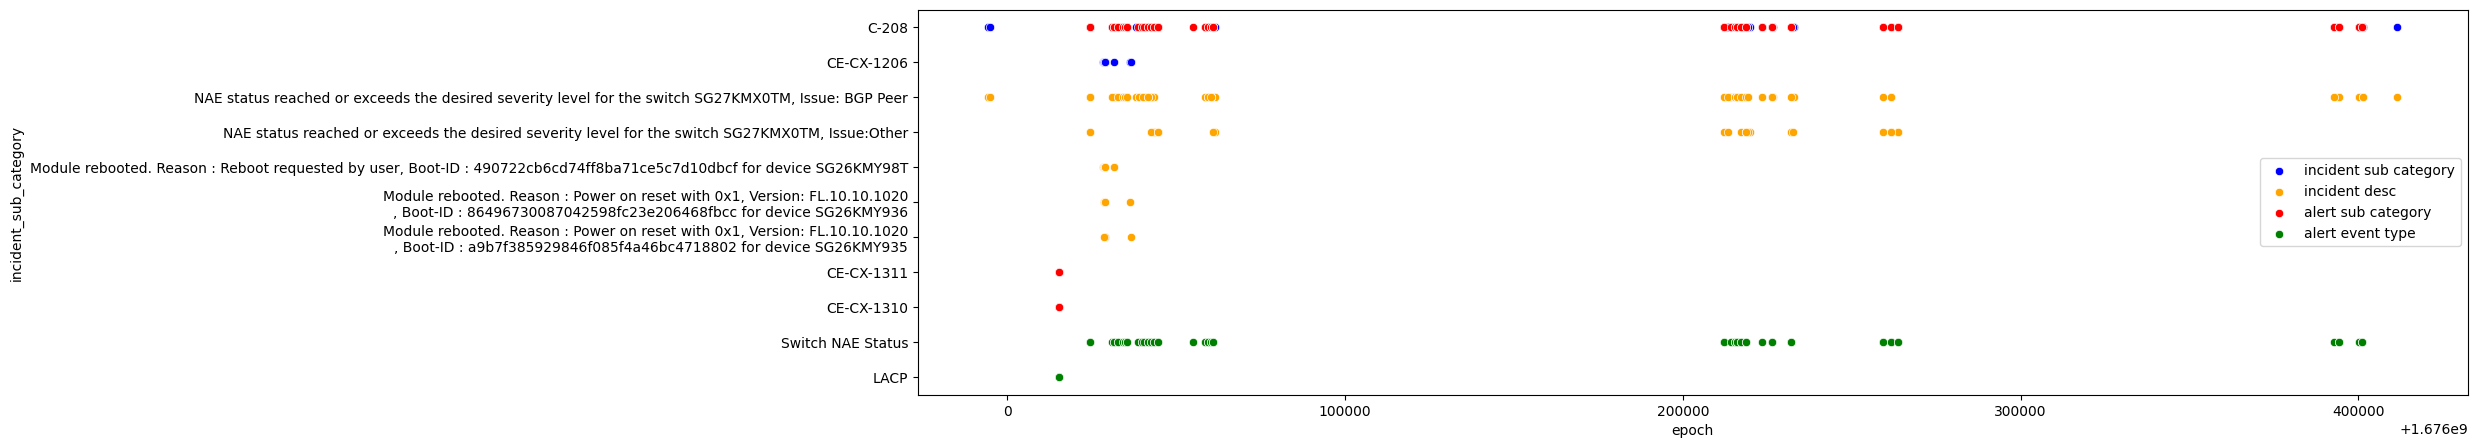

In [79]:
mpl.figure(figsize=(20, 5))


sns.scatterplot(data = inc_15feb, x = 'epoch', y = 'incident_sub_category', color='blue', label = 'incident sub category')

sns.scatterplot(data = inc_15feb, x = 'epoch', y = 'incident_desc', color = 'orange', label = 'incident desc')

sns.scatterplot(data = alert_15feb, x = 'epoch', y = 'sub_category', color='red', label = 'alert sub category')

sns.scatterplot(data = alert_15feb, x = 'epoch', y = 'alert_event_type', color = 'green', label = 'alert event type')
mpl.show()

In [82]:
inc_15feb.sort_values(by='epoch')

,incident_id,incident_acc,incident_sub_acc,incident_site,incident_sub_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
181776,INC0426634,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,In Progress,NaN,NAE status reached or exceeds the desired seve...,SG27KMX0TM,SG27KMX0TM-C-208,Central,C-208,1 - Critical,2023-02-09T10:48:50.000Z,2023-02-10 01:58:25+00:00,2023,2,10,1675994305
181785,INC0426634,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Resolved,NaN,NAE status reached or exceeds the desired seve...,SG27KMX0TM,SG27KMX0TM-C-208,Central,C-208,1 - Critical,2023-02-09T10:48:50.000Z,2023-02-10 02:07:58+00:00,2023,2,10,1675994878
196764,INC0428265,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,NAE status reached or exceeds the desired seve...,SG27KMX0TM,SG27KMX0TM-C-208,Central,C-208,1 - Critical,2023-02-10T10:22:39.000Z,2023-02-10 10:22:39+00:00,2023,2,10,1676024559
226501,INC0428266,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,NAE status reached or exceeds the desired seve...,SG27KMX0TM,SG27KMX0TM-C-208,Central,C-208,1 - Critical,2023-02-10T10:22:41.000Z,2023-02-10 10:22:41+00:00,2023,2,10,1676024561
275093,INC0428266,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,In Progress,NaN,NAE status reached or exceeds the desired seve...,SG27KMX0TM,SG27KMX0TM-C-208,Central,C-208,1 - Critical,2023-02-10T10:22:41.000Z,2023-02-10 10:22:48+00:00,2023,2,10,1676024568
122520,INC0428265,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,In Progress,NaN,NAE status reached or exceeds the desired seve...,SG27KMX0TM,SG27KMX0TM-C-208,Central,C-208,1 - Critical,2023-02-10T10:22:39.000Z,2023-02-10 10:22:51+00:00,2023,2,10,1676024571
122770,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 11:26:54+00:00,2023,2,10,1676028414
122773,INC0428444,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Power on reset with ...,SG26KMY936,SG26KMY936-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:27:45.000Z,2023-02-10 11:27:45+00:00,2023,2,10,1676028465
183472,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 11:28:36+00:00,2023,2,10,1676028516
183473,INC0428439,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,New,NaN,Module rebooted. Reason : Reboot requested by ...,SG26KMY98T,SG26KMY98T-CE-CX-1206,Supportability,CE-CX-1206,1 - Critical,2023-02-10T11:26:54.000Z,2023-02-10 11:28:37+00:00,2023,2,10,1676028517


In [138]:
#1675994305 - 1800 :: 1675994305 + 1800 : +-6 hours of the first critical incident
#1676411567
#alert_heat_C208_1 = alert_sub[(alert_sub['epoch'] >= 1675972705) & (alert_sub['epoch'] <= 1676015905)]
alert_heat_C208_1 = alert_sub[(alert_sub['epoch'] >= (1676028782-7200)) & (alert_sub['epoch'] <= (1676028782+7200))]

In [139]:
alert_heat_C208_1['event_subcat'] = alert_heat_C208_1['alert_event_type'] + ' - ' + alert_heat_C208_1['sub_category']
alert_heat_C208_1.sort_values(by='epoch')

/var/folders/s5/2f_2gwk11gx61yd2htvp_7040000gp/T/ipykernel_82546/3136562439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alert_heat_C208_1['event_subcat'] = alert_heat_C208_1['alert_event_type'] + ' - ' + alert_heat_C208_1['sub_category']


,alert_acc_id,alert_aub_acc_id,alert_site_id,alert_sub_site_id,alert_event_type,alert_device_id,alert_device_type,alert_id,category,sub_category,description,alert_timestamp,alert_severity,alert_y,alert_m,alert_d,epoch,event_subcat
78939,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 10:22:33,Critical,2023,2,10,1676024553,Switch NAE Status - C-208
78940,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 10:22:33,Critical,2023,2,10,1676024553,Switch NAE Status - C-208
78963,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 12:07:39,Critical,2023,2,10,1676030859,Switch NAE Status - C-208
78964,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 12:17:53,Critical,2023,2,10,1676031473,Switch NAE Status - C-208
78965,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 12:17:53,Critical,2023,2,10,1676031473,Switch NAE Status - C-208
78966,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 12:38:10,Major,2023,2,10,1676032690,Switch NAE Status - C-208
78967,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 12:38:10,Major,2023,2,10,1676032690,Switch NAE Status - C-208
78968,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 13:02:37,Critical,2023,2,10,1676034157,Switch NAE Status - C-208
78969,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 13:13:04,Critical,2023,2,10,1676034784,Switch NAE Status - C-208
78970,ACCT0011196,ACCT0011199,ACCT0011200,ACCT0012484,Switch NAE Status,SG27KMX0TM,switch,SG27KMX0TM-C-208,Central,C-208,Aggregated NAE status reached or exceeds the d...,2023-02-10 13:13:04,Critical,2023,2,10,1676034784,Switch NAE Status - C-208


In [120]:
# for incident subcat C-208 occuring at 1675994305 or 

alerts_count = alert_heat_C208_1.groupby('event_subcat').count()
alerts_count['range'] = '6 hours'
alerts_count.drop(['alert_acc_id', 'alert_aub_acc_id', 'alert_site_id', 'alert_sub_site_id', 'alert_device_id', 'alert_device_type', 'alert_id', 'category', 'description', 'alert_timestamp', 'alert_severity', 'alert_y', 'alert_m', 'alert_d', 'epoch'], axis=1)


# plot heat map for the first critical incident's alerts in +-30 minutes
#sns.heatmap(data = "alerts_count", x = "range", y = "event_subcat")

,alert_event_type,sub_category,range
event_subcat,,,
LACP - CE-CX-1310,20,20,30 min
LACP - CE-CX-1311,2,2,30 min


In [160]:
inc_sub_1 = incidents.loc[incidents['incident_sub_site'] == 'ACCT0012286']
alert_sub_1 = alerts.loc[alerts['alert_sub_site_id']=='ACCT0012286']

In [172]:
inc_sub_1.loc[inc_sub_1['incident_id']=='INC0421086']

,incident_id,incident_acc,incident_sub_acc,incident_site,incident_sub_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch


In [166]:
alert_heat_C208_2 = alert_sub_1[(alert_sub_1['epoch'] >= (1682026669-14400)) & (alert_sub_1['epoch'] <= (1682026669+14400))]

In [167]:
alert_heat_C208_2

,alert_acc_id,alert_aub_acc_id,alert_site_id,alert_sub_site_id,alert_event_type,alert_device_id,alert_device_type,alert_id,category,sub_category,description,alert_timestamp,alert_severity,alert_y,alert_m,alert_d,epoch


In [189]:
inc_subsites = incidents.groupby('incident_sub_site').count().sort_values(by='incident_id')
inc_subsites = inc_subsites.reset_index()
inc_subsites = inc_subsites.loc[inc_subsites['incident_id'] > 100]
inc_subsites

,incident_sub_site,incident_id,incident_acc,incident_sub_acc,incident_site,incident_state,hold_reason,incident_desc,device_id,incident_mapped_alert_id,incident_category,incident_sub_category,incident_priority,incidient_opening,u_updated_on,incident_y,incident_m,incident_d,epoch
1405,ACCT0012522,102,102,102,102,102,0,102,102,102,102,102,102,102,102,102,102,102,102
1406,ACCT0012624,102,102,102,102,102,31,102,102,102,102,102,102,102,102,102,102,102,102
1407,ACCT0012437,103,103,103,103,103,40,103,103,103,103,103,103,103,103,103,103,103,103
1408,ACCT0012834,104,104,104,104,104,52,104,104,104,104,104,104,104,104,104,104,104,104
1409,ACCT0012688,104,104,104,104,104,0,104,104,104,104,104,104,104,104,104,104,104,104
1410,ACCT0011903,104,104,104,104,104,8,104,104,104,104,104,104,104,104,104,104,104,104
1411,ACCT0013155,108,108,108,108,108,35,108,108,108,108,108,108,108,108,108,108,108,108
1412,ACCT0011603,110,110,110,110,110,0,110,110,110,110,110,110,110,110,110,110,110,110
1413,ACCT0012893,111,111,111,111,111,28,111,111,111,111,111,111,111,111,111,111,111,111
1414,ACCT0012895,112,112,112,112,112,0,112,112,112,112,112,112,112,112,112,112,112,112


In [ ]:
for i in range(len(inc_subsites)):
    x = inc_subsites.iloc[i, 0]
    inc_sub = incidents.loc[incidents['incident_sub_site']==x]
    alert_sub = alerts.loc[alerts['alert_sub_site_id']==x]
    mpl.figure(figsize=(15, 6))


    sns.scatterplot(data = inc_sub, x = 'epoch', y = 'incident_sub_category', color='blue', label = 'incident sub category')

    sns.scatterplot(data = alert_sub, x = 'epoch', y = 'sub_category', color='red', label = 'alert sub category')

    sns.scatterplot(data = alert_sub, x = 'epoch', y = 'alert_event_type', color = 'green', label = 'alert event type')
    mpl.ylabel(x)
    mpl.show()